**Project by Alessandro Platania and Gaia Sandra Schillaci on the 'Adult Data Set'**

**Data Science for Management A.Y. 2022-2023**



# Index

>2. [Introduction](#**Introduction**)  
2.1 [Dataset](##**Dataset**)  
>3. [Exploratory data analysis (EDA)](#**Exploratory-data-analysis-(EDA)*)  
3.1 [Univariate and Multivariate Analysis](#**Univariate-and-Multivariate-Analysis**)  
>4. [Supervised Learning](#**Supervised-Learning**)    
4.1 [Logistic Regression](#Logistic-Regression)  
4.2 [Gaussian Naive Bayes](#Gaussian-Naive-Bayes)  
4.3 [K-Nearest Neighbors](#K-Nearest-Neighbors)  
4.4 [Support Vector Machine (SVM)](#Support-Vector-Machine-(SVM))  
4.5 [Decision Tree](#Decision-Tree)  
4.6 [Ensemble Methods](#Ensemble-Methods)  
4.6.1 [Bagging](#Bagging)  
4.6.2 [Random Forest](#Random-Forest)  
4.6.3 [Extra Trees](#Extra-Trees)  
4.7 [Comparison of the models](#Comparison-of-the-models)  
>5. [Unsupervised Learning](#Unsupervised-Learning)  
5.1 [Principal Component Analysis (PCA) and Factor Analysis of Mixed Data (FAMD)](#principal-component-analysis-pca-and-factor-analysis-of-mixed-data-famd)  
5.2 [Clustering](#clustering)  
>6. [Semi-Supervised Learning](#semi-supervised-learning)  
6.1 [Self-training](#self-training)


# **Introduction**

The adult dataset comes from the USA repository machine learning databases. The extraction was done by Barry Becker from the 1994 census database and it has 48842 samples. Our aim is to perform a supervised analysis, testing different models in order to predict whether an individual's annual income exceeds $50,000 based on some independent variables. Moreover, we are going to perform an unsupervised analysis to look for clusters in the data and to understand if operations of dimensionality reduction are possible (like PCA).

## Dataset

Our dataset was drawn from the 1994 USA census bureau data and provides 14 input variables of different types. The complete list is:

**Age**: continuous.

**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**Fnlwgt** (Final Weight): continuous.

**Education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**Education-num**: continuous.

**Marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**Occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**Relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**Race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**Sex**: Female, Male.

**Capital-gain**: continuous.

**Capital-loss**: continuous.

**Hours-per-week**: continuous.

**Native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Our target variable is **income** that is divided into 2 classes: >*50k* and <=*50k*, so we are in front of a binary classification task.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
from collections import Counter
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from prince import FAMD
import plotly.express as px
import pylab
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
import scipy.cluster.hierarchy as shc
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering

# **Exploratory data analysis (EDA)**

To begin, we want to visualize our dataset

In [2]:
df = pd.read_csv("G:/Il mio Drive/UNIVERSITÀ/MAGISTRALE data science/2° - Adv Mach. Learning ✔/adult.csv") 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Let's start by converting our target variable in a numerical variable

In [3]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

Then, we notice that there are some missing values, highlighted with the character **'?'**. Let's see how many of them are there. 


In [4]:
df= df.replace("?",nan)  #replace ? with NaN
df.isnull().sum()  #count the null values

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

- 2799 NaN values for **workclass**
- 2809 NaN values for **occupation** 
- 857 NaN values for **native-country**

We decide to substitute the missing values with the mode of each feature.

In [5]:
df["workclass"].fillna(df["workclass"].mode()[0], inplace=True) #inplace true changes the original dataframe, #inplace false creates a copy of the dataframe
df["occupation"].fillna(df["occupation"].mode()[0], inplace=True) 
df["native-country"].fillna(df["native-country"].mode()[0], inplace=True)

In [6]:
df= df.replace("?",nan)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

As we can see we do not have null values anymore.  
After having solved this problem, we want to understand if we have a balanced or unbalanced dataset.

Class:0, Count= 37155, Percentage= 76.07%
Class:1, Count= 11687, Percentage= 23.93%


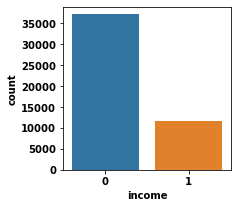

In [254]:
plt.figure(figsize=(3,3)) 
sns.countplot(x='income', data=df)
target = df.values[:,-1]  #extract the last column that is the target variable
counter = Counter(target)  #create a counter object
for k,v in counter.items():   #for each key and value
    per = v / len(target) * 100    #save in "per" the percentage of people associated with each key (the classes 0 and 1)
    print("Class:%s, Count= %d, Percentage= %.2f%%" % (k,v,per))   #%.2f%% to round the value 

As we can see, our dataset is unbalanced. In fact the 76% of our samples are associated with the class 0 (<=*50k*) while just less than 24% are associated with the class 1 (>*50k*). This is a problem that we are going to tackle in order to create model that are able to predict correctly the target of our analysis.

## Univariate and Multivariate Analysis

### Continuos variables
Let's see the general outlook of the continuos variables.  


In [255]:
df.describe(include = [np.number]) #numerical variables

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


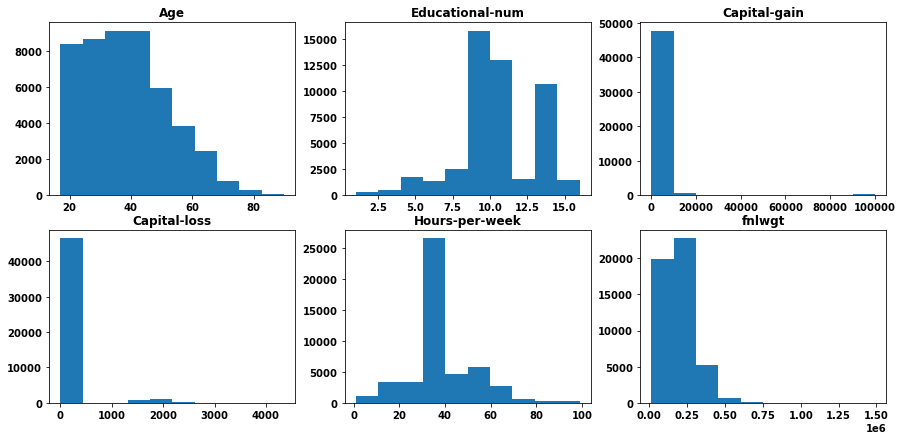

In [ ]:
#continuos variables
fig, ax = plt.subplots(nrows = 2, ncols=3,figsize=(15,7))
ax[0][0].hist(df.loc[:,"age"])
ax[0][0].set_title("Age")
ax[0][1].hist(df.loc[:,"educational-num"])
ax[0][1].set_title("Educational-num")
ax[0][2].hist(df.loc[:,"capital-gain"])
ax[0][2].set_title("Capital-gain")
ax[1][0].set_title("Capital-loss")
ax[1][0].hist(df.loc[:,"capital-loss"])
ax[1][1].hist(df.loc[:,"hours-per-week"])
ax[1][1].set_title("Hours-per-week")
ax[1][2].hist(df.loc[:,"fnlwgt"])
ax[1][2].set_title("fnlwgt")

plt.show()

- **age**: the mean age is 38.64 with a minimum value of 17 and maximum of 90. It seems that we have a rightly-skewed distribution.
- **educational-num**:  we have a distribution that is left-skewed with two peaks.
- **capital-gain**: we have a very high rightly-skewed distribution since at least the 75% of the data are equal to 0 while the maximum value is far from it (99999).
- **capital-loss**: similar consideration as "capital-gain" can be done for this variable.
- **hours-per-week**: we are in front of an almost gaussian distribution with the mean and the median almost equal (40). Moreover we noticed that the 50% of the observations lie between 40 and 45 hours while there is an high sparsity below the 25th percentile and above the 75th percentile.  
- **fnlwgt**: even this variable seems to be rightly-skewed with the mean greater than the median and a very large distance between the median itself and the maximum value.

Let's analyze the correlations between the variables

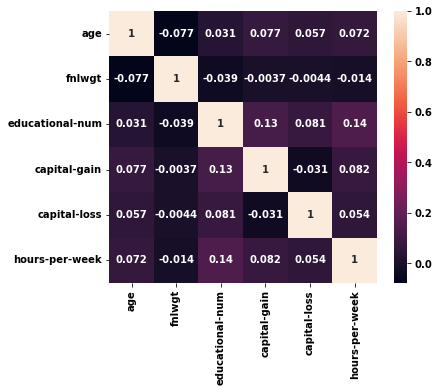

In [256]:
df_corr = df.drop('income', axis=1)  #we remove the target variable
corr_matrix = df_corr.corr()
figure(figsize = (6,5))
sns.heatmap(corr_matrix, annot=True) #annot=True to write the number inside the cells
plt.show()

It seems that there is no risk of multicollinearity as there is very low correlations between the variables.

Let's look at the distribution of values of each variables graphically, highlighting the outliers thanks to the boxplots. 

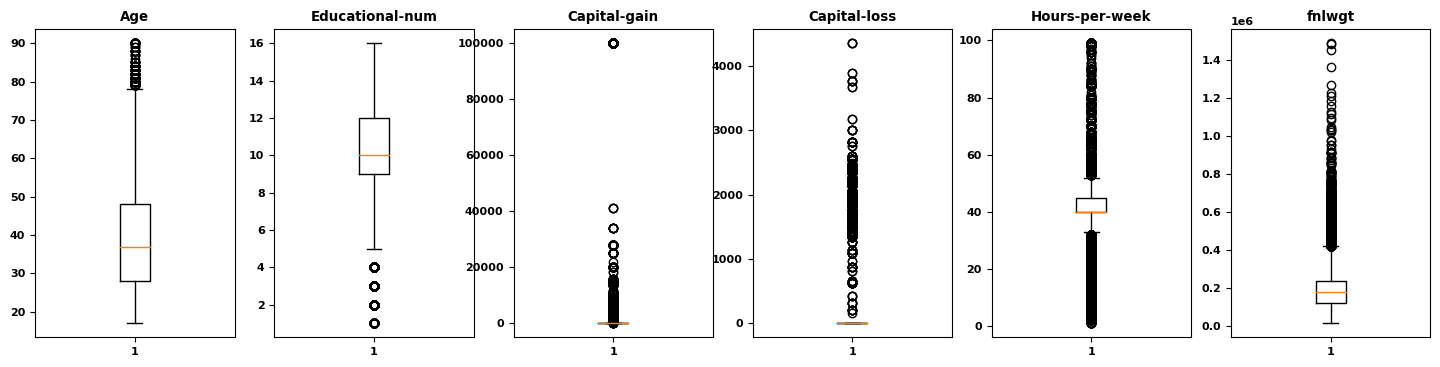

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=6,figsize=(18,4))
ax[0].boxplot(df.loc[:,"age"])
ax[0].set_title("Age")
ax[1].boxplot(df.loc[:,"educational-num"])
ax[1].set_title("Educational-num")
ax[2].boxplot(df.loc[:,"capital-gain"])
ax[2].set_title("Capital-gain")
ax[3].boxplot(df.loc[:,"capital-loss"])
ax[3].set_title("Capital-loss")
ax[4].boxplot(df.loc[:,"hours-per-week"])
ax[4].set_title("Hours-per-week")
ax[5].boxplot(df.loc[:,"fnlwgt"])
ax[5].set_title("fnlwgt")
plt.show()

At first sight, we see that variables such as *capital-gain* and *capital-loss* have the quartiles and the median associated to 0. It seems that they can be removed from our analysis since their values are not so relevant.

Let's dive in depth a bit, performing a bivariate analysis in which we consider each independent variable with respect the target variable *income*

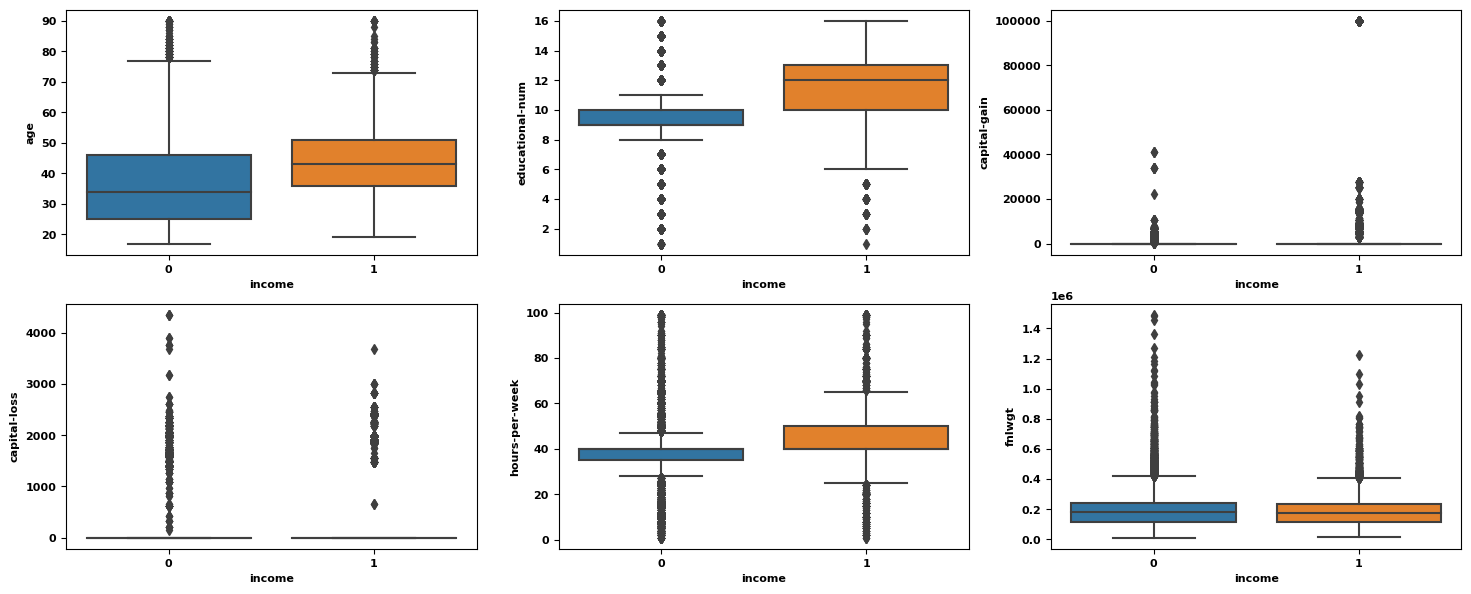

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols=3,figsize=(18,7))
sns.boxplot(ax = ax[0,0], x= df["income"], y=df["age"])
sns.boxplot(ax = ax[0,1], x= df["income"], y=df["educational-num"])
sns.boxplot(ax = ax[0,2], x= df["income"], y=df["capital-gain"])
sns.boxplot(ax = ax[1,0], x= df["income"], y=df["capital-loss"])
sns.boxplot(ax = ax[1,1], x= df["income"], y=df["hours-per-week"])
sns.boxplot(ax = ax[1,2], x= df["income"], y=df["fnlwgt"])
plt.show()

Giving a look at the boxplot in relation with our target variables, it seems more clear that we could omit some of the variables we have due to the fact that there isn't much difference in the behaviour whether income is *<=50K* or *>50K*. As a consequence, we decided to drop **capital-loss**, **capital-gain** as we thought before. Moreover, we removed also **fnlwgt** (this variable  is a sort of index but not clear description is provided on how its values are collected, so it is an extra reason for which we dropped it).

In [7]:
df.drop(["capital-loss"], axis = 1, inplace= True)  #axis = 0 for the rows, axis = 1 for the columns
df.drop(["capital-gain"], axis = 1, inplace= True)  #axis = 0 for the rows, axis = 1 for the columns
df.drop(["fnlwgt"], axis = 1, inplace= True)  #axis = 0 for the rows, axis = 1 for the columns

### Categorical variables
Now let's consider the categorical variables.

In [258]:
df.describe(include=[object]) #it considers just the objects (categorical variables)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


- The majority of people in our dataset are males (**gender**) and work as private (**workclass**)
- Almost all people are white (**race**).
- We can see the variable **native-country** has the highest number of unique values (41) and at the same time the value *United-States* has a very high frequency. Since almost all people in the dataset are from US, for simplicity we decided to drop this variable from our dataset.

In [8]:
df.drop(["native-country"], axis = 1, inplace= True)  

In [260]:
df.describe(include=[object]) #we removed native-country

,workclass,education,marital-status,occupation,relationship,race,gender
count,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male
freq,36705,15784,22379,8981,19716,41762,32650


Now we create a bar plot that put in relation the income of the people with each categorical variable. 

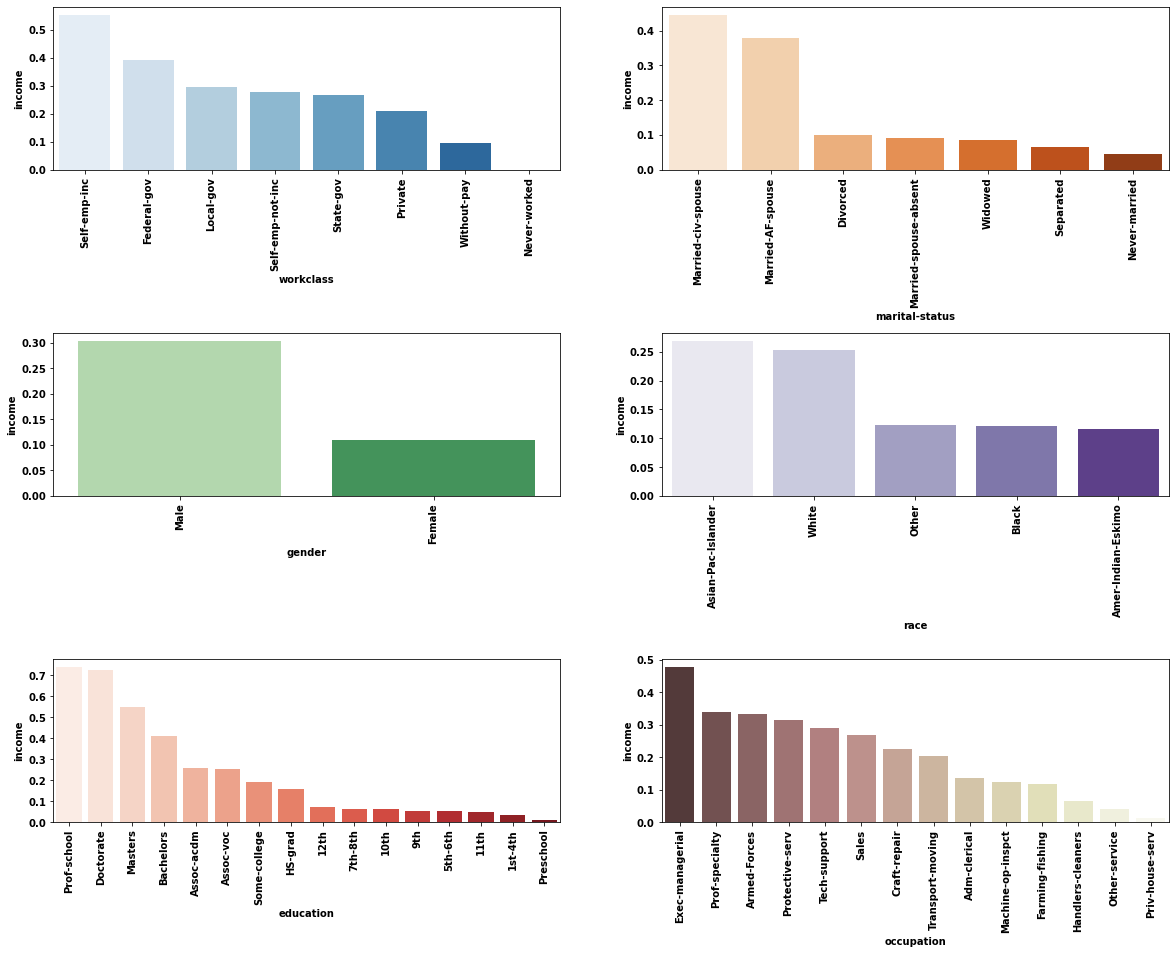

In [ ]:
#sns.set(font_scale=1)
plt.figure(figsize=(20,15)) 

plt.subplot(321)  #3 rows, 2 colums, work on the first
order = df.groupby("workclass").income.mean().sort_values(ascending=False).index
sns.barplot(x = df["workclass"], y = df["income"], data = df, ci=None, order = order, palette = 'Blues')  #A barplot can be used to represent the average value of each group. However, this kind of figure must be accompanied by error bars showing the confidence interval of each group. ci = None is not to show error bars of the confidence interval (ci) of each group
plt.xticks(rotation=90) 


plt.subplot(322)  #3 rows, 2 colums, work on the second
order = df.groupby("marital-status").income.mean().sort_values(ascending=False).index
sns.barplot(x = df["marital-status"],y = df["income"], data = df, ci=None, order = order, palette = 'Oranges') 
plt.xticks(rotation=90)

plt.subplot(323)
order = df.groupby("gender").income.mean().sort_values(ascending=False).index
sns.barplot(x = df["gender"],y = df["income"], data = df, ci=None, order = order, palette = 'Greens')
plt.xticks(rotation=90)

plt.subplot(324)
order = df.groupby("race").income.mean().sort_values(ascending=False).index
sns.barplot(x = df["race"],y = df["income"], data = df , ci=None, order = order, palette = 'Purples')
plt.xticks(rotation=90)

plt.subplot(325)
order = df.groupby("education").income.mean().sort_values(ascending=False).index
sns.barplot(x = df["education"], y = df["income"], data = df,  ci=None, order = order, palette = 'Reds')
plt.xticks(rotation=90)

plt.subplot(326)
order = df.groupby("occupation").income.mean().sort_values(ascending=False).index
sns.barplot(x = df["occupation"],y = df["income"], data = df, ci=None, order = order, palette = 'pink')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1) #The height between subplots
plt.show()


The above representation shows the relationships between the categorical variables and the target variable (income).

- The variable workclass has *Self-emp-Inc* and *Federal-gov* as the value for which it is more likely to earn more than 50K.
- The marital-status chart shows that *Married-civ-spouse* (corresponds to a civilian spouse) and *Married-AF-spouse* (a spouse in the Armed Forces) have an higher income, so a married couple has more chance to earn >50K.
- In terms of gender, males are more likely to earn an higher income than women.
- As per race, *Asian Pacific Islander* and *White* people have higher chance to earn more than other races.
- Considering the education, those with an educational background of *Prof-school* and *Doctorate* earn more and it's highly probable that they earn more than 50K.
- Those that have an occupation as *Exec-manager* or *Prof-specialty* have more chane than the other to have an high income.

With these last considerations we conclude our EDA and are ready to approach Supervised algorithms.

# **Supervised Learning**

In order to proceed , we split our dataset in two parts: training set and test set. The aim is to realize models that are able to understand the underlying patterns of our data to predict the target variable. The indices that are considered are **accuracy**, **precision**, **recall**. However, for our purposes there is no need to focus too much on precision or recall (or other indices) with respect to accuracy, because we don't have a preference on what it's better to predict (whathever outcome we want to predict, <=50K or >50K, has the same importance).
We start by performing data preprocessing, followed by some of the most important supervised algorithms:

-  Logistic Regression
-  Gaussian Naive Bayes Classification
-  K-Nearest Neighbour
-  Decision Tree
-  Support Vector Machine
-  Ensemble methods
   -  Random forests
   -  Extra trees
   -  Bagging

**Data Preprocessing**  

There are 3 fundamentals preliminary operations that need to be performed:

1.  Scaling numerical data
2.  Tranforming our categorical variables in new variables better handled by machine learning algorithms.
3.  Balancing training set

*1)  Scale numerical data*

Scaling data is one of the most important preprocessing phase, since ML algorithms work better when features are on a similar scale. The aim is to reduce the numerical differences of the values so to avoid that some of the variables are seen as more relevant than others.  
We eploited the MinMaxScaler of scikit-learn. The default range for the feature returned by MinMaxScaler is 0 to 1.

In [9]:
df_num = df[['age','educational-num','hours-per-week']]
scaler = MinMaxScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns = ["age", "educational-num", "hours-per-week"])
print(df_num_scaled)

            age  educational-num  hours-per-week
0      0.109589         0.400000        0.397959
1      0.287671         0.533333        0.500000
2      0.150685         0.733333        0.397959
3      0.369863         0.600000        0.397959
4      0.013699         0.600000        0.295918
...         ...              ...             ...
48837  0.136986         0.733333        0.377551
48838  0.315068         0.533333        0.397959
48839  0.561644         0.533333        0.397959
48840  0.068493         0.533333        0.193878
48841  0.479452         0.533333        0.397959

[48842 rows x 3 columns]


*2)  Transform categorical variables in dummy variables through one-hot encoding*

There are two main techniques used to convert categorical variables in quantitative ones:

- Ordinal econding
- One-hot encoding

Ordinal encoding means that we associate an integer to each of the values of a variable. For some variables, an ordinal encoding may be enough. The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand this relationship.  
In our case, this is not a useful solution since there isn't a rank order that we may need to preserve. 

As a consequence, we applied One-hot encoding. It means that for each categorical variable we have, we substitute it with a binary variable, creating N dummy variables as the number of unique values for each variable.

In [36]:
df_categ = df[['workclass','education','marital-status',	'occupation', 'relationship', 'race', 'gender']]  #extract the categorical variables

# Define one hot encoding
encoder = OneHotEncoder(sparse=False)  #sparse = False to avoid of having returned a sparse matrix
onehot_categ = encoder.fit_transform(df_categ)  #perform the one-hot encoding
temp_df = pd.DataFrame(onehot_categ, columns = encoder.get_feature_names_out())  #create a temp df where I put the result of the one-hot encoding and I put the names extracted from df_categ as columns
df_final = pd.concat([df_num_scaled, temp_df], axis = 1)  #axis = 1 because the concatenation must occur on the columns, not row
df_final.head(3)

,age,educational-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,0.109589,0.400000,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.287671,0.533333,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.150685,0.733333,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Now we can split our dataset in training and test set

In [11]:
df_y = df.iloc[:, -1]  #I take from the df just the target variable

x_train, x_test, y_train, y_test = train_test_split(df_final, df_y, random_state=42, shuffle = True, stratify=df_y)  #random_state -> Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. shuffle = True to change the order of the observations in the dataset. stratify = df_y to be sure that the split mantain the original proportions of data belonging to target variable  income = 0 and income = 1 in both training and test set
print("Training set: ", x_train.shape)
print("Test set: ", x_test.shape)
print("Target variable training: ",y_train.shape)
print("Target variable test: ", y_test.shape)

Training set:  (36631, 61)
Test set:  (12211, 61)
Target variable training:  (36631,)
Target variable test:  (12211,)


*3. Balancing training set*

The most relevant techniques to balance a dataset are *undersampling* and *oversampling*. In the first case, from the dataset we cut part of the data from the classes with the highest number of observations to reach the class with the lowest number of observations. In the second case the procedure is the opposite: we generate syntethic data from the class with the lowest samples to reach the number of samples of the most numerous class. In our case, we decided to perform *oversampling*. To move accordingly, we oversampled the training set so that models can train in a balanced context.

In [12]:
oversample = RandomOverSampler(sampling_strategy='minority')  #it means that we want to increase the class with lower values to reach the number of values of the other class
x_train, y_train = oversample.fit_resample(x_train, y_train)  #performing the oversampling

c:\Users\xseri\anaconda3\envs\Research2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

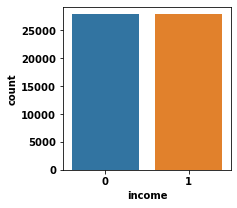

In [13]:
plt.figure(figsize=(3,3)) 
sns.countplot(y_train)

Now we can start with the Supervised algorithms.

## Logistic Regression

Logistic regression is one of the most important statistical analysis method.  
It work by estimating the probability of an event occurring based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds —that is, the probability of success divided by the probability of failure.
In machine learning it is one of the simplest and useful tool adopted.

The best parameters with GridSearchCV are:  {'C': 5, 'solver': 'newton-cg'}
Accuracy with GridSearchCV:  0.7849479977069855
Recall with GridSearchCV:  0.8415468856947297
Precision with GridSearchCV:  0.5320207702293379


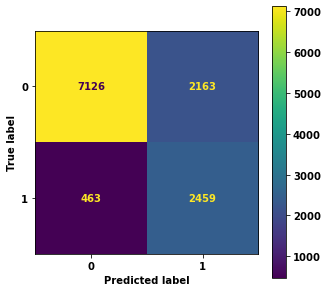

In [16]:
grid = {
    'C': [1,5,10,100],  #C is referred to the concept of regularization, smaller value means stronger regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] #Algorithm to use in the optimization problem
}

logreg_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, cv= 5, n_jobs= -1)  #cv= 5 enable stratified k-fold cross validation with k=5, n_jobs = -1 means that we use all the processors of our pc to perform the operations

                                                                                                     
logreg_cv.fit(x_train, y_train)         #fit of the model with the optimal parameters on the training data                                            
print("The best parameters with GridSearchCV are: ", logreg_cv.best_params_)
y_pred = logreg_cv.predict(x_test)     #testing the model on the test data
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
logreg_acc = accuracy_score(y_test, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test, y_pred))

## Gaussian Naive Bayes

It is a statistical classification technique based on Bayes Theorem (conditional probability), and it is used to implement the Naïve Bayes algorithm for classification. Parameters are estimated using the maximum likelihood.  
The term *Naïve* is used because the algorithm incorporates features in its model that are independent of each other. Any modifications in the value of one feature do not impact the value of any other feature of the algorithm.

Accuracy:  0.657276226353288
Recall:  0.9014373716632443
Precision:  0.40330730362884704


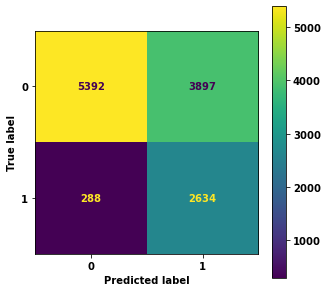

In [17]:
#No grid search since there isn't a hyper-parameter to tune
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
gnb_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

## K-Nearest Neighbors

The K-Nearest algorithm is a supervised learning classifier which uses proximity to make classifications (or predictions) about the grouping of an individual data point. For classification problems, a class label is assigned on the basis of a majority vote, i.e. the label that is most frequently represented around a given data point is used. 

The best parameters with GridSearchCV are:  {'algorithm': 'kd_tree', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy with GridSearchCV:  0.7811809024649906
Recall with GridSearchCV:  0.7060232717316907
Precision with GridSearchCV:  0.532249742002064


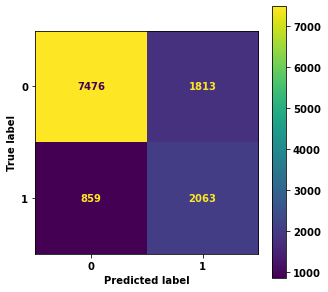

In [18]:
grid = {
    'n_neighbors': np.arange(1,10),    #The function to measure the quality of a split. 
    'weights' : ['uniform', 'distance'],  #‘uniform’ means uniform weights, so all points in each neighborhood are weighted equally. ‘distance’ means that weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    'algorithm' : ['ball_tree', 'kd_tree']  #algorithm used to compute the nearest neighbor
}
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= 5, n_jobs= -1)  #cv= 5 enable stratified k-fold cross validation with k=5      
knn.fit(x_train, y_train)
print("The best parameters with GridSearchCV are: ", knn.best_params_)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
knn_acc = accuracy_score(y_test, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test, y_pred))

## Support Vector Machine (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. Rather than modeling each class, they simply find a line or curve (in two dimensions) or a manifold (in multiple dimensions) that divides the classes from each other and that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence .

The best parameters with GridSearchCV are:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy with GridSearchCV:  0.769224469740398
Recall with GridSearchCV:  0.8288843258042436
Precision with GridSearchCV:  0.5109704641350211


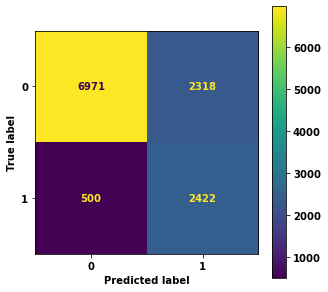

In [14]:
grid = {
    'C': [1,10],
    'kernel': ['linear', 'rbf'],    #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    'gamma' : ['scale', 'auto']                                    #if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma, if ‘auto’, uses 1 / n_features
}

sv_cv = GridSearchCV(estimator=svm.SVC(), param_grid=grid, cv= 5, n_jobs= -1)  #cv= 5 enable stratified k-fold cross validation with k=5       
sv_cv.fit(x_train, y_train)
print("The best parameters with GridSearchCV are: ", sv_cv.best_params_)
y_pred = sv_cv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
sv_acc = accuracy_score(y_test, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test, y_pred))

## Decision Tree

Decision tree is a non-parametric supervised learning method, used both for classification and regression. The aim is to create a model that predicts the
value of a target variable by learning simple decision rules inferred from the data features.  
It has a tree-like structure that starts from a root node and expands in further branches. We have two types of nodes: decision nodes where decision are taken, and leaves, that represent the output of these decisions

The best parameters with GridSearchCV are:  {'criterion': 'gini'}
Accuracy with GridSearchCV:  0.7780689542216035
Recall with GridSearchCV:  0.5975359342915811
Precision with GridSearchCV:  0.5323170731707317


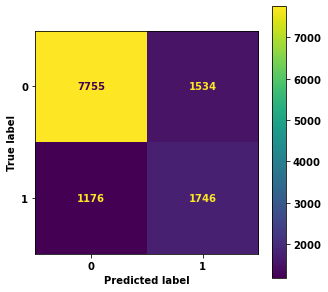

In [19]:
grid = {
    'criterion': ["gini", "entropy", "log_loss"]    #The function to measure the quality of a split. 
}

dt_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv= 5, n_jobs= -1)  #cv= 5 enable stratified k-fold cross validation with k=5      
dt_cv.fit(x_train, y_train)
print("The best parameters with GridSearchCV are: ", dt_cv.best_params_)
y_pred = dt_cv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
dt_acc = accuracy_score(y_test, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test, y_pred))

## Ensemble Methods

In general, an Ensemble method is a learning technique that combines several base models in order to produce one optimal predictive model.

### Bagging

Bagging is a general purpose procedure for reducing the variance of a statistical learning method. The underlyning idea is to create several subsets of data from training samples chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result we end up with an ensamble of different models. Average of all the predictions from different trees are used which is more robust that a single decision tree.

The best parameters with GridSearchCV are:  {'max_features': 9, 'n_estimators': 100}
Accuracy with GridSearchCV:  0.7646384407501433
Recall with GridSearchCV:  0.840520191649555
Precision with GridSearchCV:  0.5049342105263158


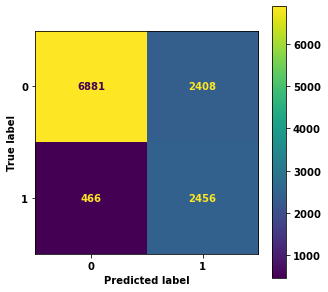

In [20]:
grid = {
    'n_estimators' : [10, 100, 200],  #The number of base estimators in the ensemble
    'max_features' : np.arange(1, 10) #The number of features to draw from X to train each base estimator (without replacement by default)
}

bagg_cv = GridSearchCV(estimator=BaggingClassifier(), param_grid=grid, cv= 5, n_jobs= -1)  #default estimator to apply bagging is decision tree      
bagg_cv.fit(x_train, y_train)
print("The best parameters with GridSearchCV are: ", bagg_cv.best_params_)
y_pred = bagg_cv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
bagg_acc = accuracy_score(y_test, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test, y_pred))

### Random Forest  

Random forest builds a large collection of decorrelated trees and than averages them. The idea is to improve the variance reduction of bagging by reducing the correlation between the trees, without increasing the variance too much. This is achieved in the tree-growing process through random selection of the input variables.  
Random forest is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of the predictors rather than using all predictors to grow trees.

The best parameters with GridSearchCV are:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy with GridSearchCV:  0.8018180329211366
Recall with GridSearchCV:  0.6403148528405201
Precision with GridSearchCV:  0.5774691358024692


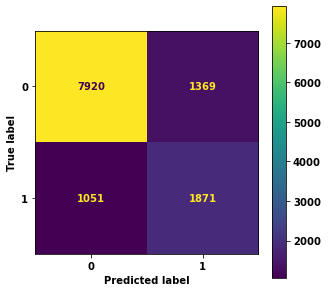

In [21]:
grid = {
    'criterion': ["gini", "entropy", "log_loss"],    #The function to measure the quality of a split. 
    'n_estimators' : [10, 100, 200],   #the number of trees in the forest
    'max_features' : ["sqrt", "log2", None], #The number of features to consider when looking for the best split. If “sqrt”, then max_features=sqrt(n_features).If “log2”, then max_features=log2(n_features). If None, then max_features=n_features
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5, n_jobs= -1)  #cv= 5 enable stratified k-fold cross validation with k=5       
rf_cv.fit(x_train, y_train)
print("The best parameters with GridSearchCV are: ", rf_cv.best_params_)
y_pred = rf_cv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
rf_acc = accuracy_score(y_test, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test, y_pred))

### Extra Trees

Extra trees method build a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  
A difference from random forest is on the selection of cut points in order to split nodes. Random Forest chooses the optimum split while Extra Trees chooses it randomly for each of the *max_features*. However, once the split points are selected, the two algorithms choose the best one between all the subset of features. Therefore, Extra Trees adds randomization but still has optimization. When *max_features* is set 1, this amounts to building a totally random decision tree

The best parameters with GridSearchCV are:  {'criterion': 'entropy', 'max_features': None, 'n_estimators': 10}
Accuracy with GridSearchCV:  0.8004258455490951
Recall with GridSearchCV:  0.5790554414784395
Precision with GridSearchCV:  0.58364953432218


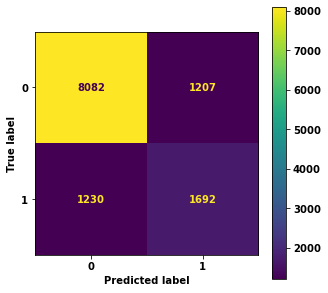

In [22]:
grid = {
    'criterion': ["gini", "entropy", "log_loss"],    #The function to measure the quality of a split. 
    'n_estimators' : [10, 100, 200],  #the number of trees in the forest
    'max_features' : ["sqrt", "log2", None], #The number of features to consider when looking for the best split. If “sqrt”, then max_features=sqrt(n_features).If “log2”, then max_features=log2(n_features). If None, then max_features=n_features
}

ext_cv = GridSearchCV(estimator=ExtraTreesClassifier(), param_grid=grid, cv= 5, n_jobs= -1)  #cv= 5 enable stratified k-fold cross validation with k=5       
ext_cv.fit(x_train, y_train)
print("The best parameters with GridSearchCV are: ", ext_cv.best_params_)
y_pred = ext_cv.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
ext_acc = accuracy_score(y_test, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test, y_pred))

## Comparison of the models

Now that we have performed all the methods, we compare the results obtained (in terms of accuracy score).

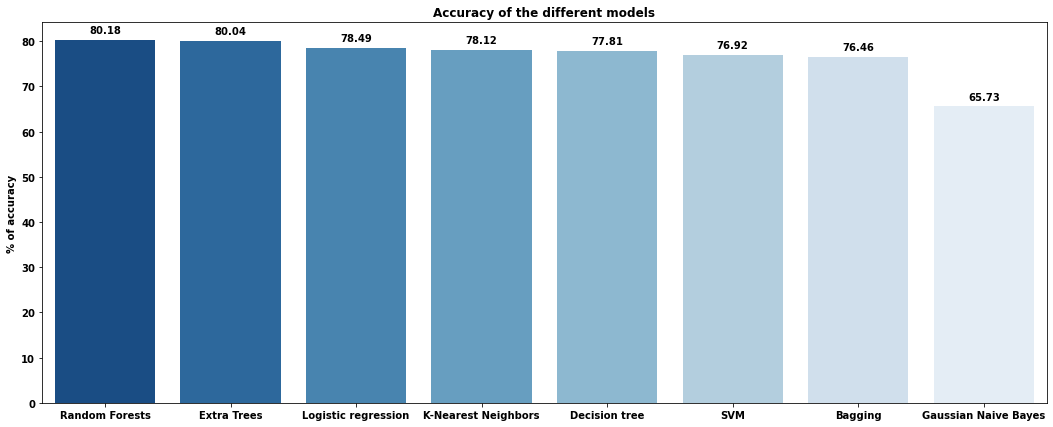

In [23]:
acc_dict = {"Logistic regression":logreg_acc*100, "Decision tree":dt_acc*100, "Gaussian Naive Bayes":gnb_acc*100, "Extra Trees" : ext_acc*100, "Random Forests" : rf_acc*100, "Bagging": bagg_acc*100, "K-Nearest Neighbors" : knn_acc*100, "SVM": sv_acc*100}
list_values = list(acc_dict.values())
list_keys = list(acc_dict.keys())
fig, ax = plt.subplots(figsize=(18,7))
palette = sns.color_palette("Blues", n_colors = 10)
palette.reverse()
ax = sns.barplot(x=list_keys, y=list_values, order=sorted(acc_dict, key=acc_dict.get, reverse=True), palette = sns.set_palette(reversed(sns.color_palette("Blues", 8)), 8))  #sort elements in descending order, the n_colors argument must also be specified in the call set_palete. https://stackoverflow.com/questions/30105541/creating-a-dark-reversed-color-palette-in-seaborn
plt.title("Accuracy of the different models")
plt.ylabel("% of accuracy")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height,2)}', (x + width/2, y + height*1.02), ha='center')  #to write the percentages

plt.show()

According to the results obtained we can state that random forests and extra trees are the best methods in terms of accuracy (**80.18%** the former, **80.04%** the latter).  
On the opposite, Gaussian Naive Bayes is the method that gave us the less reliability (65.73%). Considering also the precision and the recall (not showed in the graph), we can affirm that the two best methods are overall better than the others.  
Taking into account the dimension of the dataset the results are relevant, even though in terms of precision and recall we can see that there are some models that have difficulties and are not reliable.

# **Unsupervised Learning**

In Unsupervised Learning, the machine uses unlabeled data and learns on itself without any supervision, trying to find a pattern in the unlabeled data and giving a response. Contrary to supervised learning, in this case we don't use (or we don't have) a target variable that need to be predicted, but we look for clusters or we focus on simplify the spatial representation of the data by performing dimensionality reduction.  


- Principal Component Analysis (PCA) and Factor Analysis of Mixed Data (FAMD)
- Clustering
  - Kmeans (using just quantitative variables)
  - Kmodes (using quantitative and qualitative variables) 
  - Hierarchical clustering


## Principal Component Analysis (PCA) and Factor Analysis of Mixed Data (FAMD)

*Principal Component Analysis (PCA)* is a tool used to summarize and to visualize the information in a dataset containing statistical units described by multiple correlated quantitative variables. Each variable could be considered as a dimension. With *PCA* is possible to extract the underlying information of a multi-dimensional dataset by means of new variables called Principal Components that help to reduce the dimensionality of the dataset preserving the most relevant characteristics.  

Our dataset has both numerical and categorical variable, so *PCA* can be performed just considering part of it. When dealing with a mixture of variables, an approach that can be consider is the *Factor Analysis of Mixed Data (FAMD)*. Roughly speaking, *FAMD* works as a *PCA* for quantitative variables and as a *Multiple Correspondance Analysis (MCA)* for categorical variables. 


First of all we perform PCA (so only quantitative variables), than we'll look at FAMD.

### PCA

Considering the correlation matrix we have performed during the EDA, we can expect quite low results since variable seems to be not so correlated one each other.  
To select the best number of principal components there are different methods that can be adopted, such as the elbow method visualizable with a *scree plot* (in which the goal is to identify the presence of possible elbows in the graph) or the *Kaiser's rule* (where we should opt for the number of PCs where the eigenavalues are greater than 1)

*Scree Plot*

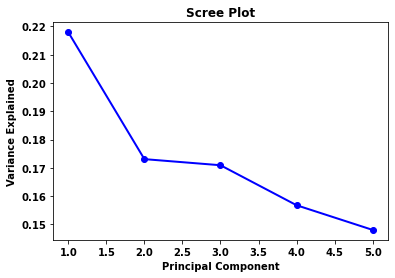

In [24]:
df_original = pd.read_csv("G:/Il mio Drive/UNIVERSITÀ/MAGISTRALE data science/2° - Adv Mach. Learning/adult.csv") #"C:/Users/gaias/Desktop/Machine Learning/adult.csv.xls"

#Fix the missing values as done also in EDA
df_original= df_original.replace("?",nan)
df_original["workclass"].fillna(df_original["workclass"].mode()[0], inplace=True) #inplace true modifica dataframe originario, #inplace false crea una copia del dataframe
df_original["occupation"].fillna(df_original["occupation"].mode()[0], inplace=True) 
df_original["native-country"].fillna(df_original["native-country"].mode()[0], inplace=True)

df_num_variables = df_original[['age', 'educational-num',	'hours-per-week', 'capital-gain' , 'capital-loss', 'fnlwgt']]
df_num_variables = StandardScaler().fit_transform(df_num_variables)  #scale variables to have 0 mean and unit variance
pca = PCA(n_components=5)
pca_performed = pca.fit_transform(df_num_variables)
PC_values = np.arange(pca.n_components_) + 1  #+1 so that the pc_values start from 1
plt.plot(PC_values, pca.explained_variance_ratio_,'o-',  linewidth=2, color='blue')  #o- put the points in the line graph, #pca.explained_variance_ratio_ refers to how much variance of the original data each component explain 
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

As imaginated, the variance explained by the components is not so high. The scree plot suggests that an optimal number of components may be 2, even though the sum of variance explained doesn't reach the 50% of the original variance of the data.

Just to add a reference with the work done with supervised algorithms, we show PCA highlighitning the observations with <=50K and >50K (it's not something needed though)

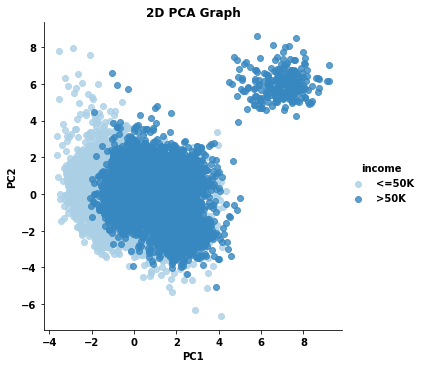

In [276]:
pca_df = pd.DataFrame(data = pca_performed[:, :2], columns = ['PC1', 'PC2'])
pca_visual = pd.concat([pca_df, df_original['income']], axis = 1)
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_visual, 
    hue='income', 
    palette = "Blues",
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()


*Kaiser's Rule*

In [277]:
#Let's see the eigenvalues
print(pca.explained_variance_)

[1.30779803 1.03834739 1.02538917 0.9404438  0.88803872]


In this case, following the idea of choosing the components that have eigenvalues > 1, the number of suggested PCs is 3.

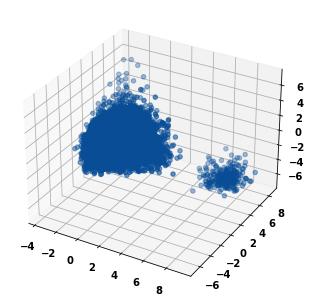

In [ ]:
fig = pylab.figure()
ax = Axes3D(fig, auto_add_to_figure=False)  #auto_add_to_figure = False because otherwise it gives a warning

pca_df = pd.DataFrame(data = pca_performed[:, :3], columns = ['PC1', 'PC2', 'PC3'])
pca_visual = pd.concat([pca_df, df_original['income']], axis = 1)
ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3)
fig.add_axes(ax)  #suggested to write in this way by pylab itself (there was a warning before)
plt.show()

### FAMD

Now let's have a look at the *Factor Analysis of Mixed Data (FAMD)*. Given the results obtained with the PCA, we do not expect to see improvements including also the categorical variables (worsening is much more likely).  
Note: in FAMD rescaling of quantitative variables is performed automatically.

In [25]:
famd = FAMD(
     n_components=2,
     n_iter=3,  #the number of iterations used for computing the Singualar Value Decomposition SVD, a process to perform dimensionality reduction
     copy=True,  #if False then the computations will be done in place which can have possible side-effects on the input data
     check_input=True,
     engine='auto',  #what SVD engine to use
    random_state=42  #set a seed to control the randomnes of the SVD results
 )
famd = famd.fit(df_original.drop('income', axis='columns'))

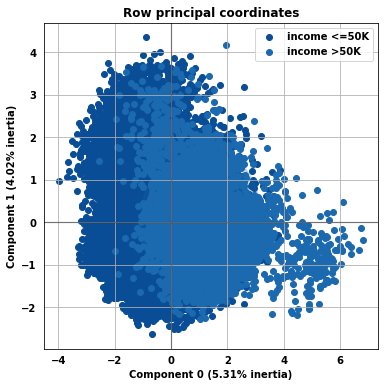

In [34]:
ax = famd.plot_row_coordinates(
     df_original,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     #labels=df.index,
     color_labels=['income {}'.format(t) for t in df_original['income']],
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True,
 )

As expected it isn't really a big deal performing these kind of operations in our dataset, since problems such as the low correlation between features or the presence of some outliers are all fundamental characteristics to perform operation of dimensionality reduction succesfully.

## Clustering

Cluster Analysis (CA), simply said clustering, is one of the most important statistical methods for discovering knowledge in multidimensional data. The goal of CA is to identify patterns (or groups, or clusters) of similar units within a dataset.

### Kmeans

K-means clustering is the most used partitioning clustering algorithm. It classifies the *n* units to the K clusters such that units within the same cluster are as similar as possible (high cluster
cohesion), whereas units from different clusters are as dissimilar as possible (high cluster separation). K-means uses Euclidean distance.

Let's see which is the optimal number of clusters using the *silhouette method*

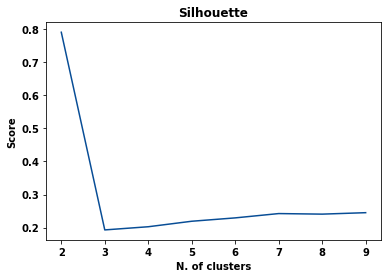

In [280]:
sc = []
for i in range (2, 10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', n_init = 10, max_iter= 300, random_state=1) #k-means++selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia, n_init = 10 is Number of times the k-means algorithm is run with different centroid seeds, Maximum number of iterations of the k-means algorithm for a single run
    kmeans.fit(df_num_variables)
    label = kmeans.predict(df_num_variables)
    score = silhouette_score(df_num_variables, label)
    sc.append(score)

plt.plot(range(2,10), sc)
plt.title("Silhouette")
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

The optimal number of clusters is 2, since with it we obtain the highest silhouette score. Let's visualize our results.

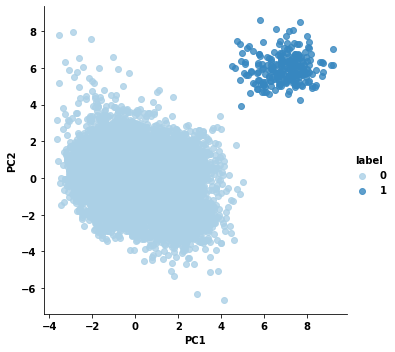

In [ ]:
kmeans = KMeans(n_clusters=2, init= 'k-means++', n_init = 10, max_iter= 300, random_state=1)
kmeans.fit(df_num_variables)
label = pd.Series(kmeans.predict(df_num_variables))

pca_visual2 = pd.concat([pca_df, label], axis = 1)
pca_visual2.rename(columns= {0: 'label'}, inplace = True)

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_visual2, 
    hue='label', 
    palette = "Blues",
    fit_reg=False,  #avoid to plot a regression model relating the variables
    legend=True
    )

plt.show()

### Kmodes

Kmodes is an extension of the kmeans method in which it's possible to consider not only quantitative variables but also qualitative ones.  
The modifications done in the k-means are:

- using a simple matching dissimilarity measure for categorical objects
- replacing means of clusters by modes
- using a frequency-based method to update the modes

In [ ]:
df_original_ = df_original.drop("income", axis = 1)
df_original_

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


Let's see which is the optimal number of clusters to consider.

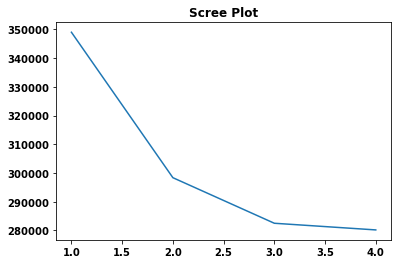

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, max_iter = 10)  #init = Cao is a method for init invented by Cao in 2009, n_init = 1 the number of time the k-modes algorithm will be run with different centroid seeds
    kmode.fit_predict(df_original_)
    cost.append(kmode.cost_)
y = np.array([i for i in range(1,5,1)])
plt.title("Scree Plot")
plt.plot(y,cost)

According to the scree plot, the optimal number of clusters is 2 or 3 (in correspondence of the elbows). We are going to work with 3 clusters.

In [ ]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1,  max_iter = 10)
fitClusters_cao = km_cao.fit(df_original_)

labels = fitClusters_cao.labels_
df_original_["labels"] = labels
df_original_["labels"] = df_original_["labels"].map({0:"First", 1:"Second", 2: "Third"})
df_original_["labels"] = df_original_["labels"].astype("category")
df_original_["labels"].cat.reorder_categories(["First", "Second", "Third"])

list_col = ['labels']
cols = [col for col in df_original_ if col not in list_col]  #it's an elegant way to remove a variable from the dataframe we want to visualize
index = ['First Cluster', 'Second Cluster', 'Third Cluster']
pd.DataFrame (fitClusters_cao.cluster_centroids_[:, 0:14], columns = cols, index = index)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
First Cluster,36,Private,125892,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
Second Cluster,20,Private,214542,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
Third Cluster,17,Private,123983,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,40,United-States


It's difficult to visualize in a better way our clusters, composed by quantitative and qualitative variables. As a consequence, above are shown just the centroids according to kmodes. They represent the "central" point of our clusters (so they are the point consisting of the mode of each feature inside each cluster)

### Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. There are two different approaches:
- Agglomerative: start with the points as individual clusters, then at each step merge the closest pair of clusters until only one cluster (or k clusters) is left.
- Divisive: start with one all-inclusive cluster, then at each step split a cluster until each cluster contains a point (or there are k clusters)  

We are going to perform agglomerative clustering.

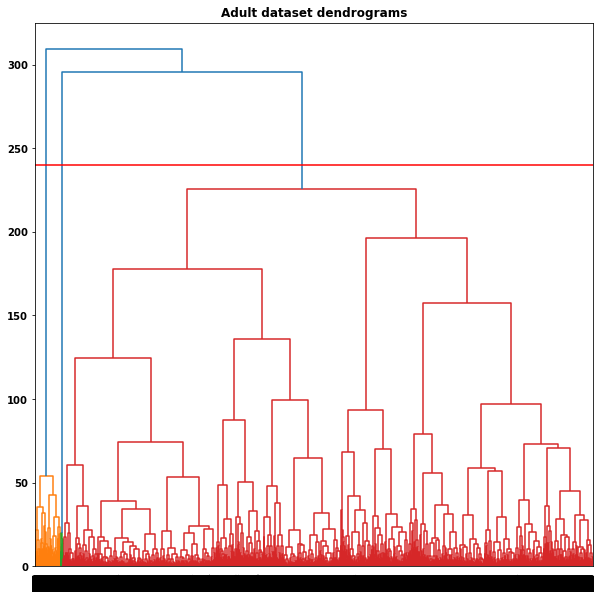

In [ ]:
plt.figure(figsize = (10,10))
plt.title("Adult dataset dendrograms")
dend = shc.dendrogram(shc.linkage(df_num_variables , method = 'ward'), color_threshold = 240)  #ward is the method through which we apply the agglomerative clustering (metric = euclidean is the deafult), color_threshold = 240 to say that above that value the lines need to have the same color
plt.axhline(y = 240, color = 'r', linestyle = '-')

In the dendrogram we have to locate the **largest vertical difference between nodes**. The number of vertical lines intersecting this horizontal line is the optimal number of clusters. In our case, the largest vertical distance between nodes leads us with the result of *k = 3* clusters.

To conlcude this part of our analysis, we want to visualize the clusters in the PCA space through a scatterplot.

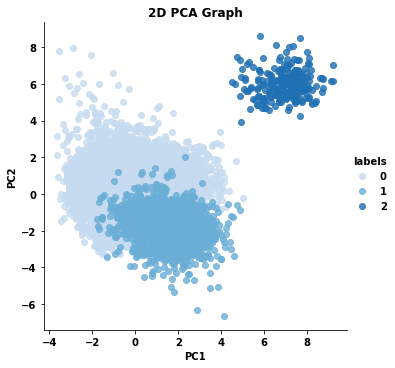

In [ ]:
aggl_cluster = AgglomerativeClustering(n_clusters = 3, linkage = "ward")
cluster = aggl_cluster.fit(df_num_variables)
labels = cluster.labels_

pca_df = pd.DataFrame(data = pca_performed[:, :2], columns = ['PC1', 'PC2'])
pca_df["labels"] = labels
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='labels', 
    palette = "Blues",
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

After having seen some unsupervised methods, we are going to perform a semi-supervised analysis.

# Semi-Supervised Learning

Semi-Supervised Learning is an approach that lies between the Supervised and the Unsupervised Learning. It is a technique that use a small proportion of labelled data with an high proportion of unlabelled data to make predictions. The starting points are the labelled data, thorugh which the algorithm recognizes pattern and works on labelling also the unlabelled data. 

## Self-training

One of the most relevant Semi-Supervised algorithm is called "Self-trainig". The workflow is:

- Pick a small amount of labeled data, and you use this dataset to train a model with a supervised method.
- Perform pseudo-labelling, i.e. use the model partially trained to make predictions for the rest of the dataset
- Take the most confident predictions made with the model by setting a confidence threshold and label data for which the confidence of the prediction is higher than the threshold.
- Add the new labelled data to the dataframe and train again the model (generally you can set 10 as max iterations)
- In the end, when you have a solid model trained on lot of data, you can test your model on the test set

Even though semi-supervised learning is an intresting machine learning method, there is no guarantee that the performances can increase compared to standard supervised methods, since it relies a lot on the data we have.

We split the dataset as follows:

- Training set labelled -> 10% of data
- Training set unlabelled -> 70% of data
- Test set (labelled) -> 20% of data

In [27]:
df_final_semisup = pd.concat([df_final, df_y], axis = 1)
df_final_semisup = df_final_semisup.sample(frac=1).reset_index(drop=True)  #frac = 1 specifies the fraction of rows to return (so =1 means all the rows), #reset_index(drop=True) reset also the original indices to reflex the new order

train_ind = round(len(df_final_semisup)*0.10)  
train_ind_unlab = train_ind + round(len(df_final_semisup)*0.70)  
test_ind = train_ind_unlab + round(len(df_final_semisup)*0.20)  

train_semisup = df_final_semisup[:train_ind]    
train_semisup_unlab = df_final_semisup[train_ind:train_ind_unlab] 
test_semisup = df_final_semisup[train_ind_unlab:]   

x_train_semisup = train_semisup.iloc[:, :61]    #take all the elements except the target
y_train_semisup = train_semisup.iloc[:, -1]     #save the target 

#oversampling of training labelled data
oversample = RandomOverSampler(sampling_strategy='minority')  #it means that we want to increase the class with lower values to reach the number of values of the other class
x_train_semisup, y_train_semisup = oversample.fit_resample(x_train_semisup, y_train_semisup)  #performing the oversampling


x_train_semisup_unlab = train_semisup_unlab.iloc[:, :61]   #take all the elements except the target
x_test_semisup = test_semisup.iloc[:, :61]      #take all the elements except the target
y_test_semisup = test_semisup.iloc[: , -1]      #save the target

print("X_training labelled data shape: ", x_train_semisup.shape)
print("Y_training labelled data shape: ", y_train_semisup.shape)
print("Training unlabelled data shape: ", x_train_semisup_unlab.shape)
print("X_test data: ", x_test_semisup.shape)
print("Y_test data: ", y_test_semisup.shape)

X_training labelled data shape:  (7408, 61)
Y_training labelled data shape:  (7408,)
Training unlabelled data shape:  (34189, 61)
X_test data:  (9769, 61)
Y_test data:  (9769,)


We decided to apply logistic regression as supervised algorithm.

### Logistic Regression with semi-supervised approach

We decided to iterate maximum 5 times the process of labelling data e training again beacuse of limitations of the hardware used.

The best parameters with GridSearchCV are:  {'C': 10, 'solver': 'liblinear'}
14344 predictions have been added to training data
19845 unlabelled data remained
----------------------------


c:\Users\xseri\anaconda3\envs\Research2\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The best parameters with GridSearchCV are:  {'C': 100, 'solver': 'saga'}
4810 predictions have been added to training data
15035 unlabelled data remained
----------------------------
The best parameters with GridSearchCV are:  {'C': 1, 'solver': 'newton-cg'}
1691 predictions have been added to training data
13344 unlabelled data remained
----------------------------
The best parameters with GridSearchCV are:  {'C': 1, 'solver': 'liblinear'}
692 predictions have been added to training data
12652 unlabelled data remained
----------------------------
The best parameters with GridSearchCV are:  {'C': 1, 'solver': 'liblinear'}
322 predictions have been added to training data
12330 unlabelled data remained
----------------------------
Accuracy with GridSearchCV:  0.7805302487460334
Recall with GridSearchCV:  0.7959621993127147
Precision with GridSearchCV:  0.5261215218625781


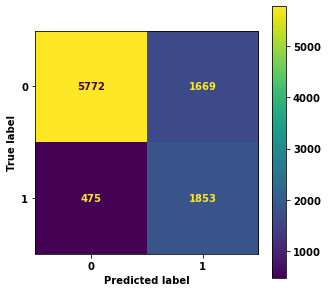

In [28]:
i=0 #to check the number of iteration
while True:

    #perform logistic regression
    grid = {
    'C': [1,5,10,100],  #C is referred to the concept of regularization, smaller value means stronger regularization
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga'] #Algorithm to use in the optimization problem
    }

    logreg_cv_semisup = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, cv= 5, n_jobs= -1)  #cv= 5 enable stratified k-fold cross validation with k=5 

                                                                                                        
    logreg_cv_semisup.fit(x_train_semisup, y_train_semisup)         #fit of the model with the optimal parameters on the training data                                            
    print("The best parameters with GridSearchCV are: ", logreg_cv_semisup.best_params_)
        
    y_pred_unlab = logreg_cv_semisup.predict(x_train_semisup_unlab)
    probs0_1 = logreg_cv_semisup.predict_proba(x_train_semisup_unlab)
    df_probs = pd.DataFrame(probs0_1, columns = ["prob0", "prob1"])
    df_probs["predictions"] = y_pred_unlab
    df_probs.index = x_train_semisup_unlab.index

    #Putting rows in which there are predictions that have probability >90% in a list called high_prob
    high_prob = pd.concat([df_probs.loc[df_probs["prob0"]>0.9], df_probs.loc[df_probs["prob1"]>0.9]], axis = 0)  #concat rows where, considering row by row, one of the two outputs has probability > 90%
#I could have written also   df_probs.iloc[list(df_probs["prob0"]>0.9)]

    #concatenate x_train_semisup and y_train_semisup with the new rows from x_train_semisup_unlab and y_train_semisup that now have the label
    x_train_semisup = pd.concat([x_train_semisup, x_train_semisup_unlab.loc[high_prob.index]], axis = 0)
    y_train_semisup = pd.concat([y_train_semisup, high_prob.predictions])


    #drop the rows that are no more unlabelled (so they don't have to stay anymore in the unlabelled dataset)
    x_train_semisup_unlab = x_train_semisup_unlab.drop(index = high_prob.index)


    print(f"{len(high_prob)} predictions have been added to training data")  #f-string way to print
    print(f"{len(x_train_semisup_unlab)} unlabelled data remained")
    print("----------------------------")

    i+=1

    if (len(high_prob) == 0):  #if all the unlabelled data have been made labelled 
        break
    elif i==5:  #if we have iterated 5 times the dataset
        break

#Outside the while cicle
#Once we have trained our model with labelled and unlabelled data (that during the training became labelled), we test it on the test set
y_pred = logreg_cv_semisup.predict(x_test_semisup)     #testing the model on the test data
cm = confusion_matrix(y_test_semisup, y_pred)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(5,5))
cm_display.plot(ax=ax)
logreg_acc_semisup = accuracy_score(y_test_semisup, y_pred)
print("Accuracy with GridSearchCV: ", accuracy_score(y_test_semisup, y_pred))
print("Recall with GridSearchCV: ", recall_score(y_test_semisup, y_pred))
print("Precision with GridSearchCV: ", precision_score(y_test_semisup, y_pred))

As we can see, the results obtained are quite good even though they don't outperform normal supervised approaches such as extra trees or random forest, being quite close to the results we got with the traditional logistic regression (in supervised learning).

# Conclusion

To conclude our analysis, we can point out some interesting considerations. Considering how vast is the dataset analyzed, the models realized showed a relevant ability in predicting overall our target variables (nest result with random forests, accuracy of **80.18**), even though in terms of precision and recall we can state that each model behaves differently. In order to improve our results we could consider new algorithms to train or perform more data cleaning and pre-processing operations.  
In terms of unsupervised analysis, our dataset resulted highly complex to be simplified through operation of dimensionality reduction. Moreover, cluster analysis showed that we can highlight 2 or 3 clusters (according to the method adopted) and we performed an analysis both with only numbers and also including categorical variables.
  
For comparison:

- https://medium.com/geekculture/full-data-analysis-for-a-classification-task-supervised-learning-e6cc4a85f7ee --> the best accuracy obtained by the author was **83%** with decision tree. Differently from us he decided to change each outlier (during univariate analysis) with the mean of that variable and dropped some samples according to some considerations he did. 